<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/3rdWeekTasks/k_NN_on_Credit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 3 : Classification model: K-NN dengan Explore matriks evaluasi pada model klasifikasi (Akurasi,Presisi,Recall,F1,AUC,ROC,etc)

Dataset : CreditDataset.csv

Dokumentasi Chat GPT : [Link](https://chatgpt.com/share/670f7c07-06dc-8005-b318-48b31a3c42a3)

Prompt : Beri kode untuk connect gcolab dengan gdrive!

In [1]:
from google.colab import drive

# Mount Google Drive ke Colab
drive.mount('/content/drive')

Mounted at /content/drive


Prompt: Beri kode untuk read dataset sebagai dataframe!


In [9]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.compose import ColumnTransformer  # Pastikan ini terimpor
from sklearn.pipeline import Pipeline  # Pastikan ini juga terimpor
import matplotlib.pyplot as plt

In [3]:
# Baca dataset CSV
df = pd.read_csv('/content/drive/MyDrive/Dataset/CreditDataset.csv')

# Tampilkan beberapa baris awal
print(df.head())


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


Prompt :  saya mempunyai data dengan output df.head dan df.info seperti diatas,
buatlah Classification model: K-NN, lalu Explore matriks evaluasi pada model klasifikasi (Akurasi,Presisi,Recall,F1,AUC,ROC,etc)

In [5]:
# 2. Pisahkan fitur (X) dan target (y)
X = df.drop('Class', axis=1)  # Fitur
y = df['Class']  # Target

In [7]:
# 3. Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [10]:
# 4. Buat pipeline untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scaling numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-Hot Encoding
    ]
)

In [11]:
# 5. Pisahkan data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 6. Buat pipeline dengan preprocessing dan model K-NN
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [13]:
# 7. Latih model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['x2', 'x5', 'x8', 'x11', 'x13', 'x16', 'x18'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17',
       'x19', 'x20'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [14]:
# 8. Prediksi pada data test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC AUC

In [15]:
# 9. Evaluasi Model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Presisi:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.765
Presisi: 0.751209349593496
Recall: 0.765
F1-Score: 0.7454132873166524
Confusion Matrix:
 [[129  12]
 [ 35  24]]

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.91      0.85       141
           2       0.67      0.41      0.51        59

    accuracy                           0.77       200
   macro avg       0.73      0.66      0.68       200
weighted avg       0.75      0.77      0.75       200



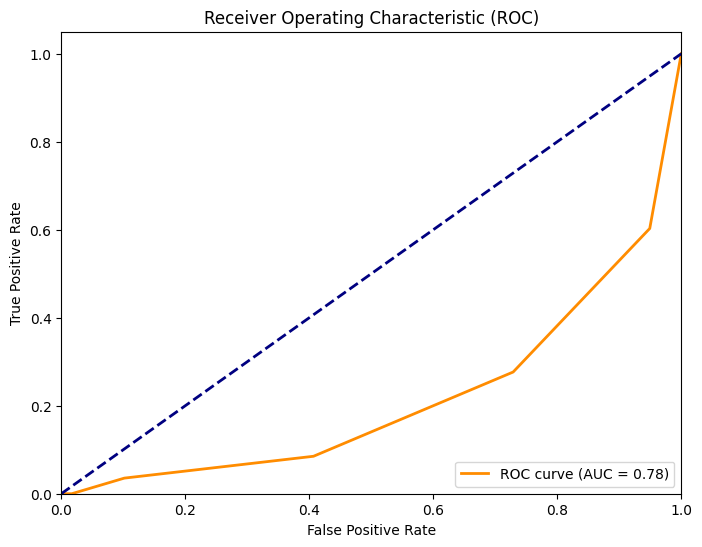

In [17]:
# 10. Plot ROC Curve dan AUC
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()